# Telecom Churn - ML Group Case Study
##### By:Subham Abhisek

### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.


For many incumbent operators, retaining high profitable customers is the number one business goal.
 
 
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Definitions of Churn
There are various ways to define churn, such as: 1. Revenue-based churn   2.Usage-based churn

For this project, you will use the **usage-based** definition to define churn.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator. 

### Business objective:
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [61]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
teleCom= pd.read_csv('telecom_churn_data.csv')
teleCom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.3

In [63]:
print (teleCom.shape)
print (teleCom.info())
teleCom.describe()

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,...,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,9

In [66]:
print ("The cutomer-level information for each customer is represented by %d features"% (teleCom.shape[1]))
print ("Unique customers in the data: %d"%len(teleCom.mobile_number.unique()))

The cutomer-level information for each customer is represented by 226 features
Unique customers in the data: 99999


In [65]:
pd.DataFrame(teleCom.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,last_date_of_month_9
9,arpu_6


##  Data Cleaning

Custome function Defination for data cleaning

In [67]:
# Funtion for Missing Values
def missngValues(missingCutoff):
    missing = round(100*(teleCom.isnull().sum()/teleCom.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [68]:
# Impute NaN
def removeNan(data,imputeColList=False,missingColList=False):
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

##### Handling missing data
Let's check for missing values in the data.

In [69]:
# Missing values per column expressed as % of total number of values
missngValues(50)

There are 40 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

Out the these 40 features, many are required and are essential for analysis. The missing values for these features seems to suggest that these customers KPI's did not have any value at that month. We can choose to impute these values with 0 to make enable these features to give value to analysis.

In [70]:
# Since av_rech_amt_data_* features are important for getting the high-value customers,
#lets impute the missing av_rech_amt_data_* with 0
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
removeNan(teleCom,imputeCol)

In [71]:
missngValues(50)

There are 4 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [72]:
# dropping the columns having more than 50% missing values
missingcol = list(missngValues(50).index)
teleCom.drop(missingcol,axis=1,inplace=True)
teleCom.shape

There are 4 features having more than 50% missing values/entries


(99999, 222)

In [73]:
# Missing values per column expressed as % of total number of values > 5%
missngValues(5) 

There are 29 features having more than 5% missing values/entries


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

September Month data is missing We should replace it with zero

In [74]:
missingcol = list(missngValues(5).index)
print ("There are %d customers having missing values for %s together"%(len(teleCom[teleCom[missingcol].isnull().all(axis=1)]),missingcol))
teleCom[teleCom[missingcol].isnull().all(axis=1)][missingcol].head()

There are 29 features having more than 5% missing values/entries
There are 7745 customers having missing values for ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9'] together


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
removeNan(teleCom,missingColList=missingcol)

In [76]:
teleCom=teleCom[~teleCom[missingcol].isnull().all(axis=1)]
teleCom.shape

(99999, 222)

In [77]:
missngValues(2)

There are 89 features having more than 2% missing values/entries


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
                      ... 
loc_ic_t2f_mou_8       5.0
loc_ic_mou_6           4.0
loc_ic_mou_7           4.0
loc_ic_mou_8           5.0
std_ic_t2t_mou_6       4.0
std_ic_t2t_mou_7       4.0
s

In [78]:
missingcol = list(missngValues(2).index)
print ("There are %d customers having missing values for %s together"%(len(teleCom[teleCom[missingcol].isnull().all(axis=1)]),missingcol))
teleCom[teleCom[missingcol].isnull().all(axis=1)][missingcol].head()

There are 89 features having more than 2% missing values/entries
There are 381 customers having missing values for ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'o

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
teleCom=teleCom[~teleCom[missingcol].isnull().all(axis=1)]
teleCom.shape

(99618, 222)

In [80]:
# For other customers where these missing values are spread out, let's impute them with zero. 

missingcol.remove('date_of_last_rech_8')
missingcol.remove('date_of_last_rech_9')
removeNan(teleCom,missingColList=missingcol)

In [81]:
# Missing values per column expressed as % of total number of values
missngValues(0)

There are 9 features having more than 0% missing values/entries


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [82]:
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in col: 
    print("Unique values in column %s are %s" % (c,teleCom[c].unique()))
                                                 

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [83]:
#Some of these features take only one value. Lets impute their missing values in these features with the mode
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    print(teleCom[c].value_counts())
    teleCom[c].fillna(teleCom[c].mode()[0], inplace=True)
print("All the above features take only one value. Lets impute the missing values in these features with the mode")


0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64
All the above features take only one value. Lets impute the missing values in these features with the mode


In [84]:
# Missing values per column expressed as % of total number of values
missngValues(0)

There are 4 features having more than 0% missing values/entries


date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [85]:
# All these features are missing together
missingcol = list(missngValues(0).index)
print ("There are %d rows in total having missing values for these variables."%(len(teleCom[teleCom[missingcol].isnull().all(axis=1)])))

There are 4 features having more than 0% missing values/entries
There are 22 rows in total having missing values for these variables.


In [86]:
teleCom[teleCom['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
teleCom[teleCom['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
teleCom[teleCom['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
teleCom[teleCom['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

Looking for columns having all values as 0.

In [87]:
zero_columns=teleCom.columns[(teleCom == 0).all()]
print ("There are {} features which has only 0 as values. These features are \n{}".format(len(zero_columns),zero_columns))

There are 11 features which has only 0 as values. These features are 
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [88]:
teleCom.drop(zero_columns,axis=1,inplace=True)

In [89]:
print("Percentage of data remaining after treating missing values: {}%".format(round(teleCom.shape[0]/99999 *100,2)))
print ("Number of customers: {}".format(teleCom.shape[0]))
print ("Number of features: {}".format(teleCom.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of customers: 99618
Number of features: 211


### Fixing data types and columns names

In [90]:
teleCom.reset_index(inplace=True,drop=True)
# list of all columns which store date
date_columns = list(teleCom.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [91]:
for col in date_columns:
    teleCom[col] = pd.to_datetime(teleCom[col], format='%m/%d/%Y')

In [92]:
teleCom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 160.4 MB


Some monthly features which are not in the standard naming (\_6,\_7,\_8,\_9)

In [93]:
teleCom.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

**Creating new feature:** 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9'

These will store the total data volume (= vol_2g_mb_* + vol_3g_mb_*) used by user.

In [94]:
for i in range(6,10):
    teleCom['vol_data_mb_'+str(i)] = (teleCom['vol_2g_mb_'+str(i)]+teleCom['vol_3g_mb_'+str(i)]).astype(int)

In [95]:
rechcol = teleCom.filter(regex=('count')).columns
teleCom[rechcol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Creating new feature:** avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9

These will store the average recharge value for each customer for every month

In [96]:
for i in range(6,10):
    teleCom['avg_rech_amt_'+str(i)] = round(teleCom['total_rech_amt_'+str(i)]/teleCom['total_rech_num_'+str(i)]+1,2)

In [97]:
removeNan(teleCom,missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'])

**Creating new feature:** total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9

These will store the total number of data recharge (=count_rech_2g + count_rech_3g ) for each month.

In [98]:
for i in range(6,10):
    teleCom['total_rech_num_data_'+str(i)] = (teleCom['count_rech_2g_'+str(i)]+teleCom['count_rech_3g_'+str(i)]).astype(int)

**Creating new feature:** total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9

These will store the total amount of data recharge (=total_rech_num_data * av_rech_amt_data ) for each month.

In [99]:
for i in range(6,10):
    teleCom['total_rech_amt_data_'+str(i)] = teleCom['total_rech_num_data_'+str(i)]*teleCom['av_rech_amt_data_'+str(i)]

**Creating new feature:** total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9

These will store the total recharge amount (= total_rech_amt + total_rech_amt_data ) for each customer, for each month.

In [100]:
for i in range(6,10):
    teleCom['total_month_rech_'+str(i)] = teleCom['total_rech_amt_'+str(i)]+teleCom['total_rech_amt_data_'+str(i)]
teleCom.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [101]:
avg_goodPhase =(teleCom.total_month_rech_6 + teleCom.total_month_rech_7)/2
hv_cutoff= np.percentile(avg_goodPhase,70)
highValue_users = teleCom[avg_goodPhase >=  hv_cutoff]
highValue_users.reset_index(inplace=True,drop=True)

print("High-Value Customers in the Dataset are: %d\n"% len(highValue_users))
print("Percentage High-value users in data : {}%".format(len(highValue_users)/teleCom.shape[0]*100))

High-Value Customers in the Dataset are: 29906

Percentage High-value users in data : 30.02067899375615%


###### Tagging Churners
Now tag the Churend customers (churned=1, else 0) based on the fourth month as follows:

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag teleComers are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [103]:
def getTeleChStatus(data,churnPhaseMonth):
    teleCom_features= ['total_ic_mou_','total_og_mou_','vol_2g_mb_','vol_3g_mb_']
    comStatus = ~data[[s + str(churnPhaseMonth) for s in teleCom_features ]].any(axis=1)
    #print (comStatus)
    comStatus = comStatus.map({True:1, False:0})
    return comStatus

In [104]:
highValue_users['churn'] = getTeleChStatus(highValue_users,9)
print("There are {} users tagged as Churners out of {} High-Value Customers.".format(len(highValue_users[highValue_users.churn == 1]),highValue_users.shape[0]))
print("High-value teleCom Percentage : {}%".format(round(len(highValue_users[highValue_users.churn == 1])/highValue_users.shape[0] *100,2)))


There are 2418 users tagged as Churners out of 29906 High-Value Customers.
High-value teleCom Percentage : 8.09%


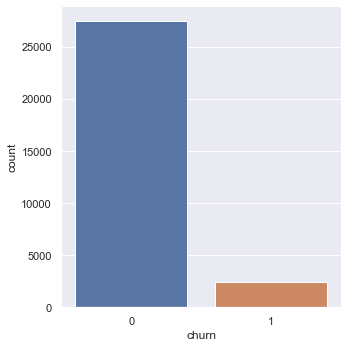

In [105]:
sns.set(style="darkgrid")
ax = sns.catplot(x="churn", kind="count", data=highValue_users);
plt.tight_layout()
plt.show()

##  Data Analysis

In [106]:
# Filtering the common monthly columns for each month
comcol = highValue_users.filter(regex ='_6').columns
mnthlycol = [item.strip('_6') for item in comcol]
mnthlycol

['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'vol_data_mb',
 'avg_rech_amt',
 'total_rech_num_data',
 'total_rech_amt_data',
 'total_month_rech']

In [107]:
# Removing all the attributes corresponding to the Churn phase
c_9s = highValue_users.filter(regex=('_9')).columns
highValue_users.drop(c_9s,axis=1,inplace=True)

In [108]:
pd.set_option('display.max_columns', 200)

In [109]:
highValue_users

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,113,152,115,91.50,85.00,127.00,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1
1,7000701601,109,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,

In [110]:
# list of all the monthly columns 6,7,8,9
allmnthlycol = [x + s for s in ['_6','_7','_8'] for x in mnthlycol]
allmnthlycol

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'vol_data_mb_6',
 'avg_rech_

In [111]:
# list of column which are not monthly columns
nonmnthlycol = [i for i in highValue_users.columns if i not in allmnthlycol]
nonmnthlycol

['mobile_number', 'circle_id', 'aon', 'churn']

In [112]:
highValue_users

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,113,152,115,91.50,85.00,127.00,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1
1,7000701601,109,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,

In [113]:
highValue_users['circle_id'].unique()

array([109], dtype=int64)

What I observe here is that circle id has same value 109 so we can drop it as it will not help in modelling

In [114]:
highValue_users.drop('circle_id',axis=1,inplace=True)

Looking Into MOU as I think its and Important Feature to Work On

In [116]:
# Avg.Incoming MOU per month churn vs Non-churn
highValue_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.401726,307.108317,299.319664
1,232.221162,183.978888,63.813168


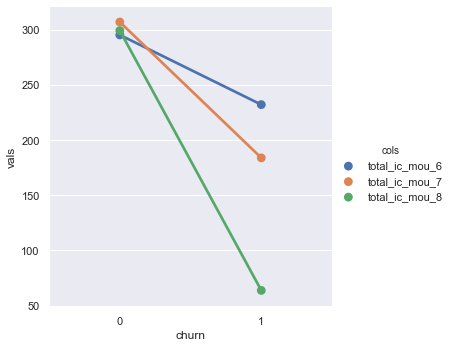

In [117]:
hv11=highValue_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()
hv11['churn']=hv11.index
hv11 = hv11.melt('churn', var_name='cols',  value_name='vals')
g = sns.factorplot(x="churn", y="vals", hue='cols', data=hv11)

In [118]:
# Avg. Outgoing MOU per month churn vs Non-churn
highValue_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,594.414582,629.096568,582.380539
1,795.591038,631.859433,210.659326


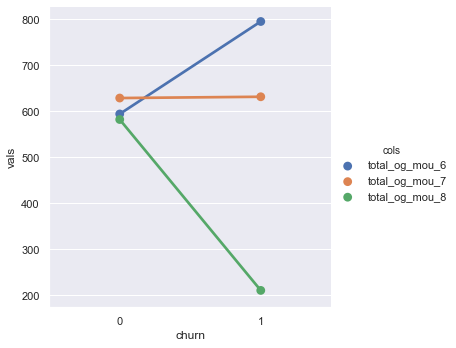

In [119]:
hv21=highValue_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()
hv21['churn']=hv21.index
hv21 = hv21.melt('churn', var_name='cols',  value_name='vals')
g = sns.factorplot(x="churn", y="vals", hue='cols', data=hv21)

## Modeling

In [54]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [55]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="top right")
    plt.show()
    return fpr, tpr, thresholds

In [56]:
def getMetrics(actual_teleCom=False,pred_teleCom=False):
    confusion = metrics.confusion_matrix(actual_teleCom, pred_teleCom)
    TP = confusion[1,1]
    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0] 
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_teleCom,pred_teleCom)))
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    print('Specificity: {}'.format(TN / float(TN+FP)))
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_teleCom, pred_teleCom )))

In [57]:
def predChurnWith_Prob(model,X,y,prob):
    pred_probs = model.predict_proba(X)[:,1]
    y_df= pd.DataFrame({'teleCom':y, 'teleCom_Prob':pred_probs})
    y_df['final_predicted'] = y_df.teleCom_Prob.map( lambda x: 1 if x > prob else 0)
    getMetrics(y_df.teleCom,y_df.final_predicted)
    return y_df

In [58]:
def findOptimalCutoff(df):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.teleCom_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.teleCom, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [59]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

In [60]:
# creating copy of the final hv_user dataframe
highValue_users_PCA = highValue_users.copy()
# removing the columns not required for modeling
highValue_users_PCA.drop(['mobile_number'], axis=1, inplace=True)

In [61]:
 # removing the datatime columns before PCA
dateTimeCols = list(highValue_users_PCA.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
highValue_users_PCA.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [62]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = highValue_users_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = highValue_users_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [63]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [64]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

### Handling class imbalance.

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

**Informed Over Sampling: Synthetic Minority Over-sampling Technique**

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

**Advantages**
- Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
- No loss of useful information

In [65]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, teleCom event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1700
Before OverSampling, counts of label '0': 19234 

Before OverSampling, teleCom event rate : 8.12% 



In [66]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [67]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, teleCom event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38468, 166)
After OverSampling, the shape of train_y: (38468,) 

After OverSampling, counts of label '1': 19234
After OverSampling, counts of label '0': 19234
After OverSampling, teleCom event rate : 50.0% 



In [68]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [69]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

we'll let PCA select the number of components basen on a variance cutoff we provide

In [70]:
# let PCA select the number of components basen on a variance cutoff 
#pca_again = PCA(0.9)

In [71]:
#df_train_pca2 = pca_again.fit_transform(X_train_res)
#df_train_pca2.shape
# we see that PCA selected 12 components

In [72]:
#X_train_pca = pca_again.fit_transform(X_train_res)
#X_train_pca.shape

In [73]:
#Applying selected components to the test data - 50 components
#X_test_pca = pca_again.transform(X_test)
#X_test_pca.shape

 **Looking at the screeplot to assess the number of needed principal components**

In [74]:
pca.explained_variance_ratio_[:50]

array([0.53684213, 0.11824244, 0.08283584, 0.04657992, 0.02464235,
       0.02264491, 0.01698948, 0.01637005, 0.01342403, 0.01182179,
       0.00896303, 0.00788941, 0.00621522, 0.00556386, 0.0050356 ,
       0.00420984, 0.0038475 , 0.00368575, 0.00350996, 0.00339114,
       0.00314349, 0.00302183, 0.00281661, 0.00263673, 0.00250478,
       0.00235846, 0.00218095, 0.00215734, 0.00210435, 0.00198112,
       0.00178602, 0.00163925, 0.00137543, 0.00133281, 0.00130593,
       0.00121803, 0.0011344 , 0.00099542, 0.00097213, 0.00090006,
       0.00082312, 0.00079647, 0.00075446, 0.00074091, 0.00071958,
       0.00067592, 0.00065907, 0.00063052, 0.00061472, 0.00056713])

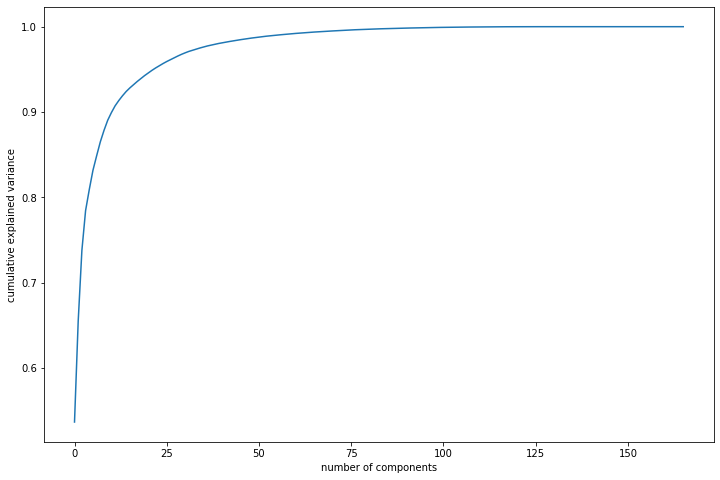

In [75]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### **Looks like 50 components are enough to describe 95% of the variance in the dataset**
- We'll choose 50 components for our modeling

In [76]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

In [77]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38468, 35)

In [78]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.017988024749548328 , min corr:  -0.04304640272543947


Indeed - there is no correlation between any two components! We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [79]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 35)

For the prediction of teleCom customers we will be fitting variety of models and select one which is the best predictor of teleCom. Models trained are,
    1. Logistic Regression
    2. Decision Tree
    3. Random Forest
    4. Boosting models - Gradient Boosting Classifier and XGBoost Classifier
    5. SVM

### 1. Logistic Regression

##### Applying Logistic Regression on our principal components

In [80]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [81]:
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8276
Recall/Sensitivity : 0.8419
AUC Score (Train): 0.899916
CV Score : Mean - 0.8991384 | Std - 0.002363273 | Min - 0.896604 | Max - 0.9035499


In [82]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
getMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.8166071923935926
Sensitivity/Recall : 0.8161559888579387
Specificity: 0.8170583959292465
False Positive Rate: 0.18294160407075358
Positive predictive value: 0.27958015267175573
Negative Predictive value: 0.9808027923211169
sklearn precision score value: 0.27958015267175573


In [83]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8169861792242532
Recall : 0.8161559888579387
Precision : 0.27958015267175573


In [84]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.9


In [85]:
cut_off_prob=0.5
y_train_df = predChurnWith_Prob(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8275969637100968
Sensitivity/Recall : 0.8419465529790995
Specificity: 0.8132473744410939
False Positive Rate: 0.1867526255589061
Positive predictive value: 0.8184574951986253
Negative Predictive value: 0.8372765228562252
sklearn precision score value: 0.8184574951986253


,teleCom,teleCom_Prob,final_predicted
0,0,0.752711,1
1,0,0.012587,0
2,0,0.117175,0
3,0,0.027511,0
4,0,0.828808,1


**Plotting the ROC Curve :**
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

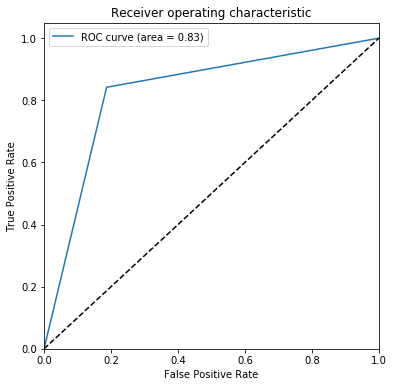

(array([0.        , 0.18675263, 1.        ]),
 array([0.        , 0.84194655, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [86]:
plot_roc(y_train_df.teleCom, y_train_df.final_predicted)

The roc curve is lying in the top left corner which is a sign of a good fit.

In [87]:
#plot_roc(y_pred_final.teleCom, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.teleCom, y_train_df.final_predicted)))

roc_auc_score : 0.83


**Finding Optimal Cutoff Point**<br>
Since recall or sensitivity is a much more important metrics for teleCom prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.671649  0.981699  0.361599
0.2   0.2  0.741032  0.953884  0.528179
0.3   0.3  0.784990  0.920713  0.649267
0.4   0.4  0.813273  0.884839  0.741707
0.5   0.5  0.827597  0.841947  0.813247
0.6   0.6  0.827805  0.779453  0.876157
0.7   0.7  0.813481  0.710513  0.916450
0.8   0.8  0.774930  0.598212  0.951648
0.9   0.9  0.597328  0.209629  0.985027


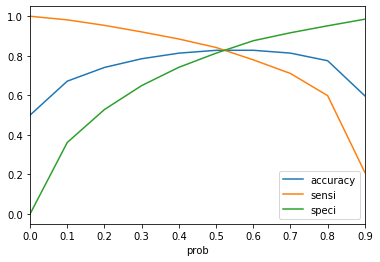

In [88]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

#### **From the curve above, 0.45 is the optimum point .**
Although, other cutoff between 0.4 and 0.6 can also be taken but to keep the test sensitivity/recall significant we choose 0.45. At this point there is a balance of sensitivity, specificity and accuracy.

**Making prediction on test**

In [89]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predChurnWith_Prob(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8202921909119267
Sensitivity/Recall : 0.8629510242279297
Specificity: 0.7776333575959239
False Positive Rate: 0.2223666424040761
Positive predictive value: 0.7951137724550899
Negative Predictive value: 0.850167680327403
sklearn precision score value: 0.7951137724550899


,teleCom,teleCom_Prob,final_predicted
0,0,0.752711,1
1,0,0.012587,0
2,0,0.117175,0
3,0,0.027511,0
4,0,0.828808,1
...,...,...,...
38463,1,0.830856,1
38464,1,0.881601,1
38465,1,0.900483,1
38466,1,0.872671,1


In [90]:
# predicting with the choosen cut-off on test
predChurnWith_Prob(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8116353478991869
Sensitivity/Recall : 0.841225626740947
Specificity: 0.7820450690574267
False Positive Rate: 0.2179549309425733
Positive predictive value: 0.2513524760715772
Negative Predictive value: 0.9826457603897092
sklearn precision score value: 0.2513524760715772


,teleCom,teleCom_Prob,final_predicted
4265,0,0.435240,0
29221,0,0.586600,1
974,0,0.405037,0
1602,0,0.337283,0
10225,0,0.155818,0
...,...,...,...
6262,0,0.215882,0
1424,0,0.045616,0
18308,0,0.256250,0
22978,0,0.113784,0


The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.
- **train sensitivity  :** 86.47%, **train roc auc score  :** 82.1%
- **test sensitivity   :** 84.40%, **test roc auc score  :** 81.21%

### 2. Decision Tree

##### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning

In [91]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7671
Recall/Sensitivity : 0.7835
AUC Score (Train): 0.840582
CV Score : Mean - 0.8397154 | Std - 0.001964813 | Min - 0.8377103 | Max - 0.8428874


In [92]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getMetrics(actual_teleCom=y_test,pred_teleCom=pred_probs_test)

Roc_auc_score : 0.7436564900077146
Sensitivity/Recall : 0.7395543175487466
Specificity: 0.7477586624666828
False Positive Rate: 0.2522413375333172
Positive predictive value: 0.20321469575200918
Negative Predictive value: 0.9705928605126593
sklearn precision score value: 0.20321469575200918


In [93]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [94]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   21.5s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:   33.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=10,
                                              splitter='best'),
             iid='warn', n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         '

In [95]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8076013563444613 using {'max_depth': 14, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [96]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [97]:
modelfit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8333
Recall/Sensitivity : 0.8411
AUC Score (Train): 0.916991
CV Score : Mean - 0.891041 | Std - 0.00575421 | Min - 0.8836172 | Max - 0.899715


In [98]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getMetrics(actual_teleCom=y_test,pred_teleCom=pred_probs_test)

Roc_auc_score : 0.7502379195906028
Sensitivity/Recall : 0.6908077994428969
Specificity: 0.8096680397383087
False Positive Rate: 0.1903319602616913
Positive predictive value: 0.23996129656507015
Negative Predictive value: 0.9678493845039826
sklearn precision score value: 0.23996129656507015


In [99]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8254
           1       0.24      0.69      0.36       718

    accuracy                           0.80      8972
   macro avg       0.60      0.75      0.62      8972
weighted avg       0.91      0.80      0.84      8972



Even after hyperparameter tuning for the Decision Tree. The recall rate is 67.54% which is not very significant to predict the teleCom.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict teleCom.

In [100]:
# predicting teleCom with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predChurnWith_Prob(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8333160029115109
Sensitivity/Recall : 0.8410627014661537
Specificity: 0.825569304356868
False Positive Rate: 0.17443069564313196
Positive predictive value: 0.8282305959451157
Negative Predictive value: 0.8385614702154626
sklearn precision score value: 0.8282305959451157


,teleCom,teleCom_Prob,final_predicted
0,0,0.608000,1
1,0,0.019231,0
2,0,0.348101,0
3,0,0.030000,0
4,0,0.933227,1


     prob  accuracy     sensi     speci
0.0   0.0  0.594806  1.000000  0.189612
0.1   0.1  0.715114  0.991733  0.438494
0.2   0.2  0.777867  0.964594  0.591141
0.3   0.3  0.809114  0.934283  0.683945
0.4   0.4  0.827675  0.889103  0.766247
0.5   0.5  0.833316  0.841063  0.825569
0.6   0.6  0.828169  0.782209  0.874129
0.7   0.7  0.808984  0.701466  0.916502
0.8   0.8  0.767703  0.581262  0.954144
0.9   0.9  0.693615  0.403920  0.983311


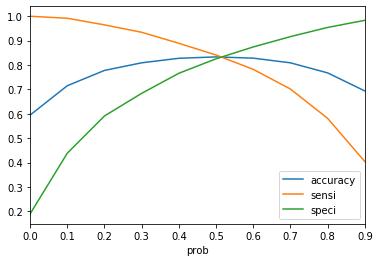

In [101]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

**From the curve above, let'choose 0.4 as the optimum point to make a high enough sensitivity.**

In [102]:
# predicting teleCom with cut-off 0.4
cut_off_prob=0.4
y_train_df = predChurnWith_Prob(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8276749506082979
Sensitivity/Recall : 0.8891026307580326
Specificity: 0.766247270458563
False Positive Rate: 0.23375272954143703
Positive predictive value: 0.7918229383710701
Negative Predictive value: 0.8735700314148539
sklearn precision score value: 0.7918229383710701


,teleCom,teleCom_Prob,final_predicted
0,0,0.608000,1
1,0,0.019231,0
2,0,0.348101,0
3,0,0.030000,0
4,0,0.933227,1


- At 0.58 cut-off prob. there is a balance of sensitivity , specificity and accuracy.
<br>Lets see how it performs on test data.

In [103]:
#Lets see how it performs on test data.
y_test_df= predChurnWith_Prob(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7488650729316351
Sensitivity/Recall : 0.745125348189415
Specificity: 0.7526047976738551
False Positive Rate: 0.2473952023261449
Positive predictive value: 0.2076057431121459
Negative Predictive value: 0.9713838936669272
sklearn precision score value: 0.2076057431121459


,teleCom,teleCom_Prob,final_predicted
4265,0,0.160377,0
29221,0,0.000000,0
974,0,0.029412,0
1602,0,0.019048,0
10225,0,0.144144,0


- Decision tree after selecting optimal cut-off also is resulting in a model with
<br>**Train Recall : 89.78%**  and  **Train Roc_auc_score : 82.40**
<br>**Test Recall : 78.13%**  and  **Test Roc_auc_score : 76.56**

Random Forest still seems overfitted to the data. 

### 3. Random Forest

##### Applying Random Forest Classifier on our principal components with Hyperparameter tuning

In [104]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

#### Tuning max_depth

In [105]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="f1",return_train_score=True)
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [106]:
scores = rfgs.cv_results_
type(scores)

dict

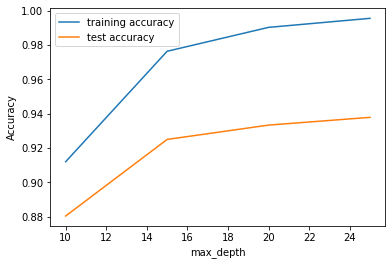

In [107]:
scores = pd.DataFrame.from_dict(scores)
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
          scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Test f1-score almost becomes constant after max_depth=20

#### Tuning n_estimators

In [108]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3,
                    return_train_score=True,
                   scoring="recall")

In [109]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_

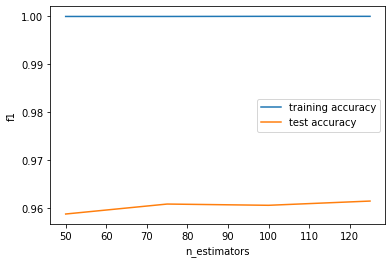

In [110]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

Selecting n_estimators = 80

#### Tuning max_features

In [113]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters,
                    return_train_score=True,
                    cv=5, 
                   scoring="f1")

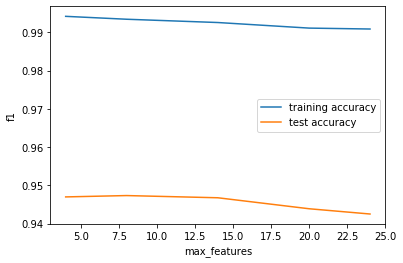

In [114]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'max_features')

Selecting max_features = 5

#### Tuning min_sample_leaf

In [117]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(rf4, parameters,
                    return_train_score=True,
                    cv=3, 
                   scoring="f1")

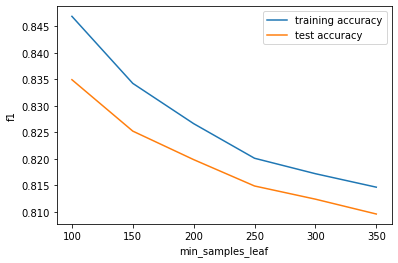

In [118]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

Selecting min_sample_leaf = 100

#### Tuning min_sample_split

In [121]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters,
                    return_train_score=True,
                    cv=3, 
                   scoring="f1")

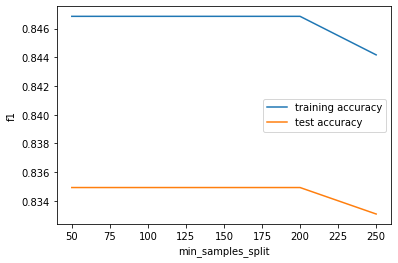

In [122]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

Selecting min_sample_split = 150

#### Tunned Random Forest

In [123]:
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [124]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.8582
Recall/Sensitivity : 0.8491
AUC Score (Train): 0.935892
CV Score : Mean - 0.9194557 | Std - 0.00294415 | Min - 0.913968 | Max - 0.9226362


In [125]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [126]:
print("Model performance on Test data:")
getMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.8022025954496276
Sensitivity/Recall : 0.7465181058495822
Specificity: 0.8578870850496729
False Positive Rate: 0.1421129149503271
Positive predictive value: 0.3136337039204213
Negative Predictive value: 0.9749414842351646
sklearn precision score value: 0.3136337039204213


After hyperparameter tuning for the random forest. The Recall rate(Test) is 73.39%.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict teleCom.

In [127]:
# predicting teleCom with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predChurnWith_Prob(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8581938234376625
Sensitivity/Recall : 0.8490693563481335
Specificity: 0.8673182905271914
False Positive Rate: 0.13268170947280858
Positive predictive value: 0.8648519832653709
Negative Predictive value: 0.8517743170793975
sklearn precision score value: 0.8648519832653709


,teleCom,teleCom_Prob,final_predicted
0,0,0.553228,1
1,0,0.042310,0
2,0,0.218854,0
3,0,0.189235,0
4,0,0.867698,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.579833  1.000000  0.159665
0.2   0.2  0.723017  0.993345  0.452688
0.3   0.3  0.810154  0.964958  0.655350
0.4   0.4  0.848393  0.912187  0.784600
0.5   0.5  0.858194  0.849069  0.867318
0.6   0.6  0.843792  0.766039  0.921545
0.7   0.7  0.803135  0.648383  0.957887
0.8   0.8  0.722653  0.462410  0.982895
0.9   0.9  0.589165  0.180774  0.997556


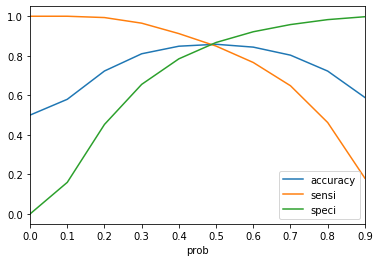

In [128]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

**From the curve above, 0.45 is the optimal point with high enough sensitivity.**

In [129]:
cut_off_prob=0.45
predChurnWith_Prob(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.856322137880836
Sensitivity/Recall : 0.8819278361235312
Specificity: 0.8307164396381408
False Positive Rate: 0.1692835603618592
Positive predictive value: 0.8389633513032296
Negative Predictive value: 0.8755548249219135
sklearn precision score value: 0.8389633513032296


,teleCom,teleCom_Prob,final_predicted
0,0,0.553228,1
1,0,0.042310,0
2,0,0.218854,0
3,0,0.189235,0
4,0,0.867698,1
...,...,...,...
38463,1,0.718784,1
38464,1,0.950824,1
38465,1,0.959633,1
38466,1,0.833048,1


**Making prediction on test**

In [130]:
y_test_df= predChurnWith_Prob(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8003797264160941
Sensitivity/Recall : 0.7771587743732591
Specificity: 0.823600678458929
False Positive Rate: 0.176399321541071
Positive predictive value: 0.2770605759682224
Negative Predictive value: 0.9770048864616269
sklearn precision score value: 0.2770605759682224


,teleCom,teleCom_Prob,final_predicted
4265,0,0.401288,0
29221,0,0.326300,0
974,0,0.552021,1
1602,0,0.322800,0
10225,0,0.188946,0


- Random Forest after selecting optimal cut-off also is resulting in a model with
<br>**Train Recall : 88.70%**  and  **Train Roc_auc_score : 85.60**
<br>**Test Recall : 77.57%**  and  **Test Roc_auc_score : 79.65**

### 4. Boosting models

###### 4.1 Gradiant boosting Classifier

###### Applying Gradiant boosting Classifier on our principal components with Hyperparameter tuning

In [131]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Fitting the default GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8545
Recall/Sensitivity : 0.8558
AUC Score (Train): 0.926563
CV Score : Mean - 0.9182564 | Std - 0.00365068 | Min - 0.9129214 | Max - 0.9241012


In [132]:
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(20,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [133]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 140}, 0.9040308582600024)

In [134]:
# Hyperparameter tuning for max_depth and min_sample_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=140,
                                                  n_iter_no_change=None,
                                                  presor

In [135]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 15, 'min_samples_split': 200}, 0.9472024172046059)

In [136]:
# Hyperparameter tuning for min_sample_leaf
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15,min_samples_split=200, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch3.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=15,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=200,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=140,
                                                  n_iter_no_change=None,
                                                  pre

In [137]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 30}, 0.9465706892063985)

In [138]:
# Hyperparameter tuning for max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15, min_samples_split=200, min_samples_leaf=30, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch4.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=15,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=30,
                                                  min_samples_split=200,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=140,
                                                  n_iter_no_change=None,
                                                  pres

In [139]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 17}, 0.9494809264061819)

Tunned GradientBoostingClassifier

In [140]:
# Tunned GradientBoostingClassifier
gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_features=15,max_depth=15, min_samples_split=200, min_samples_leaf=40, subsample=0.8, random_state=10)
modelfit(gbm_final, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9996
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9875886 | Std - 0.0008853362 | Min - 0.9862183 | Max - 0.9890111


In [141]:
# predictions on Test data
dtest_predictions = gbm_final.predict(X_test_pca)

In [142]:
# model Performance on test data
getMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.7597982374376769
Sensitivity/Recall : 0.5835654596100278
Specificity: 0.936031015265326
False Positive Rate: 0.06396898473467409
Positive predictive value: 0.4424498416050686
Negative Predictive value: 0.9627414330218068
sklearn precision score value: 0.4424498416050686


Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict teleCom.

In [143]:
# predicting teleCom with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predChurnWith_Prob(gbm_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9995840698762608
Sensitivity/Recall : 1.0
Specificity: 0.9991681397525216
False Positive Rate: 0.0008318602474784236
Positive predictive value: 0.9991688311688312
Negative Predictive value: 1.0
sklearn precision score value: 0.9991688311688312


,teleCom,teleCom_Prob,final_predicted
0,0,0.076267,0
1,0,0.000671,0
2,0,0.021787,0
3,0,0.031211,0
4,0,0.225980,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.967168  1.000000  0.934335
0.2   0.2  0.990330  1.000000  0.980659
0.3   0.3  0.996803  1.000000  0.993605
0.4   0.4  0.998882  1.000000  0.997764
0.5   0.5  0.999584  1.000000  0.999168
0.6   0.6  0.999896  0.999948  0.999844
0.7   0.7  0.999766  0.999584  0.999948
0.8   0.8  0.998154  0.996309  1.000000
0.9   0.9  0.984689  0.969377  1.000000


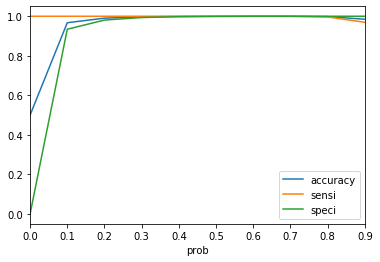

In [144]:
findOptimalCutoff(y_train_df)

In [145]:
cut_off_prob=0.1
predChurnWith_Prob(gbm_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.967167515857336
Sensitivity/Recall : 1.0
Specificity: 0.9343350317146719
False Positive Rate: 0.06566496828532807
Positive predictive value: 0.9383812265209542
Negative Predictive value: 1.0
sklearn precision score value: 0.9383812265209542


,teleCom,teleCom_Prob,final_predicted
0,0,0.076267,0
1,0,0.000671,0
2,0,0.021787,0
3,0,0.031211,0
4,0,0.225980,1
...,...,...,...
38463,1,0.988929,1
38464,1,0.986455,1
38465,1,0.992679,1
38466,1,0.990239,1


**Making prediction on test**

In [146]:
y_test_df= predChurnWith_Prob(gbm_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8009849871050957
Sensitivity/Recall : 0.7799442896935933
Specificity: 0.822025684516598
False Positive Rate: 0.17797431548340198
Positive predictive value: 0.2759980285855101
Negative Predictive value: 0.9772432665994527
sklearn precision score value: 0.2759980285855101


,teleCom,teleCom_Prob,final_predicted
4265,0,0.557434,1
29221,0,0.016989,0
974,0,0.394845,1
1602,0,0.055840,0
10225,0,0.014711,0


This model is litrally over-fitting the Training data with a lower performance on the Test data.

###### 4.2 XGBoost Classifier

##### Applying XGBoost Classifier on our principal components with Hyperparameter tuning

In [148]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [149]:
# Model fit and performance on Train data
modelfit(xgb1, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9982
Recall/Sensitivity : 0.9997
AUC Score (Train): 0.999992
CV Score : Mean - 0.9854528 | Std - 0.001032783 | Min - 0.9845525 | Max - 0.9874539


In [150]:
# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, retur

In [151]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9467100521122025)

In [152]:
# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose

In [153]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.2}, 0.9467681685715276)

In [154]:
# Final XGBClassifier
xgb2 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [155]:
# Fit Train data
modelfit(xgb2, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9965
Recall/Sensitivity : 0.9996
AUC Score (Train): 0.999955
CV Score : Mean - 0.9862613 | Std - 0.001131824 | Min - 0.9850148 | Max - 0.9883553


In [156]:
# Prediction on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [157]:
# Model evaluation on Test data
getMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.7670338615260737
Sensitivity/Recall : 0.6016713091922006
Specificity: 0.9323964138599466
False Positive Rate: 0.06760358614005331
Positive predictive value: 0.43636363636363634
Negative Predictive value: 0.9641693811074918
sklearn precision score value: 0.43636363636363634


Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict teleCom.

In [158]:
# predicting teleCom with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predChurnWith_Prob(xgb2,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9965165852136842
Sensitivity/Recall : 0.9995840698762608
Specificity: 0.9934491005511075
False Positive Rate: 0.006550899448892586
Positive predictive value: 0.9934890450599422
Negative Predictive value: 0.9995815024063611
sklearn precision score value: 0.9934890450599422


,teleCom,teleCom_Prob,final_predicted
0,0,0.106268,0
1,0,0.000277,0
2,0,0.056761,0
3,0,0.009945,0
4,0,0.525271,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.942862  1.000000  0.885723
0.2   0.2  0.975824  1.000000  0.951648
0.3   0.3  0.988094  1.000000  0.976188
0.4   0.4  0.993215  0.999844  0.986586
0.5   0.5  0.996517  0.999584  0.993449
0.6   0.6  0.997504  0.998648  0.996361
0.7   0.7  0.996699  0.995217  0.998180
0.8   0.8  0.991291  0.983051  0.999532
0.9   0.9  0.961241  0.922533  0.999948


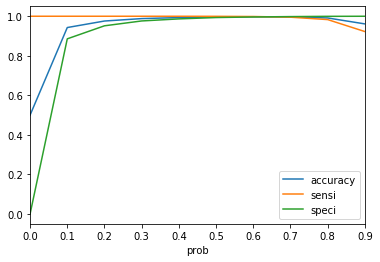

In [159]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

In [160]:
# Selecting 0.2 as cut-off in an attempt to improve recall rate
cut_off_prob=0.2
predChurnWith_Prob(xgb2,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.9758240615576583
Sensitivity/Recall : 1.0
Specificity: 0.9516481231153167
False Positive Rate: 0.04835187688468337
Positive predictive value: 0.9538781987700853
Negative Predictive value: 1.0
sklearn precision score value: 0.9538781987700853


,teleCom,teleCom_Prob,final_predicted
0,0,0.106268,0
1,0,0.000277,0
2,0,0.056761,0
3,0,0.009945,0
4,0,0.525271,1
...,...,...,...
38463,1,0.985659,1
38464,1,0.975586,1
38465,1,0.978469,1
38466,1,0.989206,1


**Making prediction on test**

In [161]:
y_test_df= predChurnWith_Prob(xgb2,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7979642519909314
Sensitivity/Recall : 0.7353760445682451
Specificity: 0.8605524594136177
False Positive Rate: 0.13944754058638237
Positive predictive value: 0.31447290053603333
Negative Predictive value: 0.9739476210064445
sklearn precision score value: 0.31447290053603333


,teleCom,teleCom_Prob,final_predicted
4265,0,0.584183,1
29221,0,0.029576,0
974,0,0.400816,1
1602,0,0.048127,0
10225,0,0.029502,0


### 5. SVM

##### Using linear kernal

In [162]:
# instantiate an object of class SVC()
# note that we are using cost C=1
svm0 = SVC(C = 1)

In [163]:
# fit
svm0.fit(X_train_pca, y_train_res)

# predict on train
y_pred = svm0.predict(X_train_pca)
getMetrics(y_train_res,y_pred)

Roc_auc_score : 0.8127534574191536
Sensitivity/Recall : 0.7976499948008735
Specificity: 0.8278569200374337
False Positive Rate: 0.17214307996256628
Positive predictive value: 0.8224950410121696
Negative Predictive value: 0.8035831440827655
sklearn precision score value: 0.8224950410121696


In [164]:
# Predict on test
y_pred = svm0.predict(X_test_pca)
getMetrics(y_test,y_pred)

Roc_auc_score : 0.8001995149815098
Sensitivity/Recall : 0.7688022284122563
Specificity: 0.8315968015507633
False Positive Rate: 0.16840319844923674
Positive predictive value: 0.2842430484037075
Negative Predictive value: 0.9763869132290185
sklearn precision score value: 0.2842430484037075


###### Hyperparameter tuning for linear kernal

Let's see if we can tune the hyperparameters of SVM and get a better Sensitivity score.

In [165]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

svm1 = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs=4,
                       return_train_score=True) 
model_cv.fit(X_train_pca, y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  7.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=4, param_grid={'C': [0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=1)

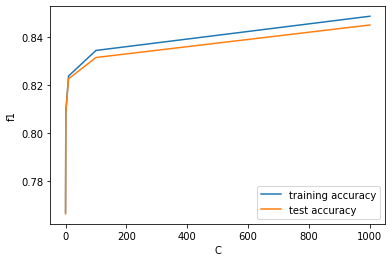

In [166]:
plot_traintestAcc(model_cv.cv_results_,'C')

In [167]:
model_cv.best_params_

{'C': 1000}

In [168]:
svm_final = SVC(C = 1000)
# fit
svm_final.fit(X_train_pca, y_train_res)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [169]:
# predict
y_pred = svm_final.predict(X_test_pca)

In [170]:
getMetrics(y_test,y_pred)

Roc_auc_score : 0.8119539239183771
Sensitivity/Recall : 0.754874651810585
Specificity: 0.8690331960261691
False Positive Rate: 0.13096680397383087
Positive predictive value: 0.33394947627849664
Negative Predictive value: 0.976051163423595
sklearn precision score value: 0.33394947627849664


##### Using non-linear kernal

In [171]:
svm_k = SVC(C = 1000, kernel='rbf')
svm_k.fit(X_train_pca, y_train_res)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [172]:
y_pred = svm_k.predict(X_test_pca)

In [173]:
getMetrics(y_test,y_pred)

Roc_auc_score : 0.8119539239183771
Sensitivity/Recall : 0.754874651810585
Specificity: 0.8690331960261691
False Positive Rate: 0.13096680397383087
Positive predictive value: 0.33394947627849664
Negative Predictive value: 0.976051163423595
sklearn precision score value: 0.33394947627849664


**Recall Score: 78%**

Now that we have a variety of models used to predict the Churn for the telecom. Let's caompare and decide a model of choice for this problem of Churn prediction.

## Final Choice of Model 

Recall is the most important business metric for the telecom Churn problem. The company would like to identify most customers at risk of Churning, even if there are many customers that are misclassified as Churn. The cost to the company of Churning is much higher than having a few false positives. 

## Models and Their Metrics

|  Logistic Regression(cut-off = 0.45)  | Train   | Test   |
|---------------------------------------|---------|--------|
| Roc_auc_score                         | 82.11%  | 81.21% |
| Sensitivity/Recall                    | 86.48%  | 84.40% |
| Specificity                           | 77.75%  | 78.02% |
| precision                             | 79.54%  | 25.04% |

| DecisionTree ( cut-off = 0.4)         | Train   |  Test  |
|---------------------------------------|---------|--------|
| Roc_auc_score                         | 82.41%  | 76.57% |
| Sensitivity/Recall                    | 89.79%  | 78.13% |
| Specificity                           | 75.03%  | 75%    |
| precision                             | 78.24%  | 21.38% |

| Random Forest (cut-off = 0.45)        | Train   | Test   |
|---------------------------------------|---------|--------|
| Roc_auc_score                         | 85.60%  | 96.53% |
| Sensitivity/Recall                    | 88.70%  | 77.57% |
| Specificity                           | 82.50%  | 81.73% |
| precision                             | 83.52%  | 26.97% |

| XGB (cut-off = 0.2)                   | Train   | Test   |
|---------------------------------------|---------|--------|
| Roc_auc_score                         | 97.24%  | 80.76% |
| Sensitivity/Recall                    | 99.99%  | 76.13% |
| Specificity                           | 94.49%  | 85.38% |
| precision                             | 94.78%  | 32.13% |

| SVM (linear   C = 1000 )              | Train   | Test   |
|---------------------------------------|---------|--------|
| Roc_auc_score                         | 81.33%  | 82.62% |
| Sensitivity/Recall                    | 79.91%  | 78.40% |
| Specificity                           | 82.75%  | 86.85% |
| precision                             | 82.25%  | 35.14% |

Overall, the **Logistic Regression** model with probability cut-off = 0.45, performs best. It achieved the **best recall accuracy of 84.4%** for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting.

Next, Linear SVM which achieves a recall rate of 78.40%, a slightly better precision of 35.14% and a balanced overall accuracy on train and test.

From the Tree Family, the Decision Tree overfitted the data slightly while obtaining 78.13% recall accuracy on test data. 
The Random Forest avoided overfitting but obtained only 77.57% recall accuracy on test data. 

Among the Bossting Methods, Gradient Boosting Classifer (GBC) achived 81.81% recall rate and XGBoost Classifier achived 76.13% but both tend to overfit the training data.



## Identifying relevant teleCom features. 

Using an instance of Random Forest classifier to identify the features most relevant to Churn. 

### Random Forest for Churn driver features 

In [174]:
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)

In [175]:
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 12.8min
[Parallel(n_jobs=4)]: Done 324 out of 324 | elapsed: 22.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [176]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8905843818238536 using {'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [177]:
rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10)

In [178]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

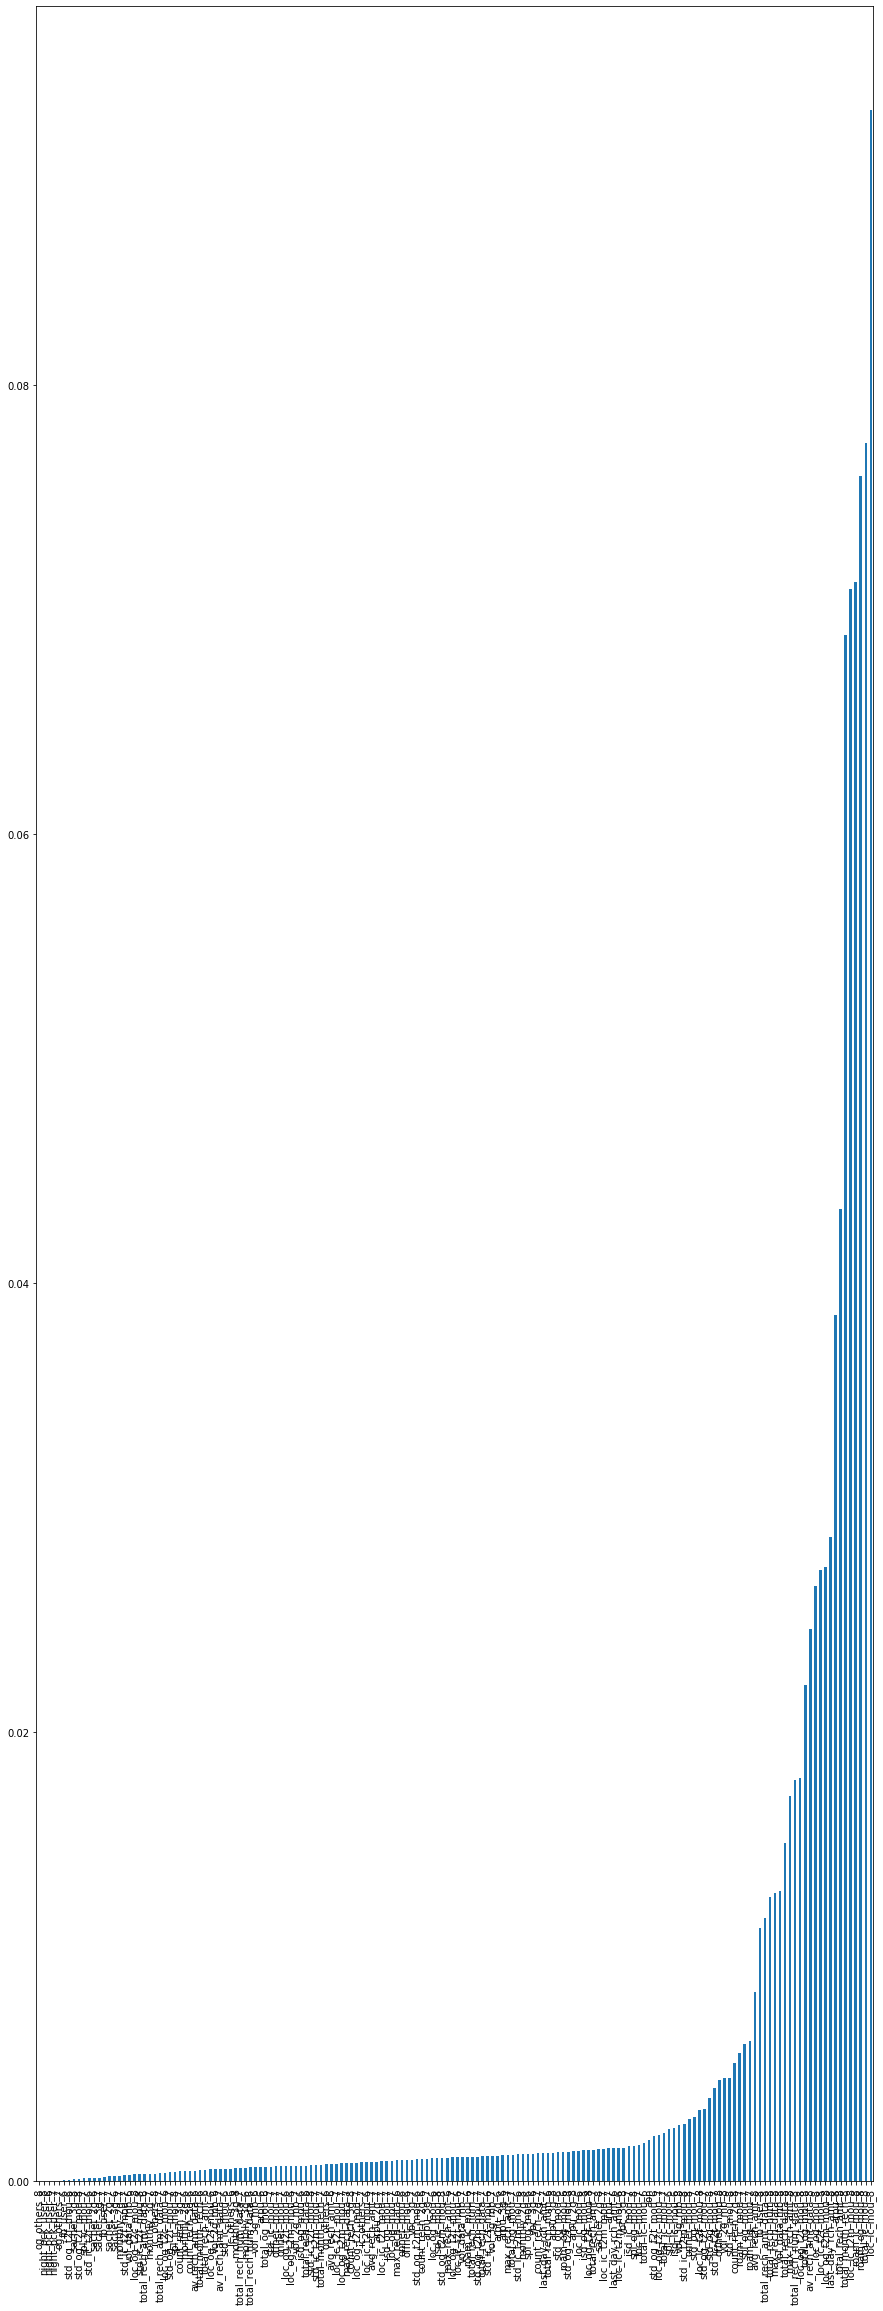

In [179]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='bar', align='center')

Some of the top main predictiors of Churn are the monthly KPI features for the action phase (3rd month August).

the graph above suggest that the top 25 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer teleCom of high value customers. Specifically, these features are as follows:




1.	**total_ic_mou_8**		-- *Total incoming minutes of usage in month 8*
2.	**loc_ic_mou_8**		-- *local incoming minutes of usage in month 8*
3.	**total_month_rech_8**	-- *Total month recharge amount in month 8*	
4.	**total_roam_mou_8**	-- *Total incoming+outgoing roaming minutes of usage in month 8*
5.	**loc_ic_t2m_mou_8**	-- *local incoming calls to another operator minutes of usage in month 8*
6.	**roam_og_mou_8**		-- *outgoing roaming calls minutes of usage in month 8*
7.	**Total_loc_mou_8**		-- *Total local minutes of usage in month 8*
8.	**roam_ic_mou_8**		-- *incoming roaming calls minutes of usage in month 8*
9.	**total_rech_amt_8**	-- *total recharge amount in month 8*
10.	**loc_ic_t2t_mou_8**	-- *local incoming calls from same operator minutes of usage in month 8*
11.	**max_rech_amt_8**		-- *maximum recharge amount in month 8*
12.	**last_day_rch_amt_8**	-- *last (most recent) recharge amount in month 8*
13.	**arpu_8**				-- *average revenue per user in month 8*
14.	**loc_og_mou_8**		-- *local outgoing calls minutes of usage in month 8*
15.	**loc_og_t2n_mou_8**	-- *local outgoing calls minutes of usage to other operator mobile in month 8*
16.	**av_rech_amt_data_8**	-- *average recharge amount for mobile data in month 8*
17.	**total_rech_data_8**	-- *total data recharge (MB) in month 8*
18.	**total_og_t2t_mou_8**	-- *total outgoing calls from same operator minutes of usage in month 8*
19.	**total_rech_num_8**	-- *total number of recharges done in the month 8*
20.	**total_rech_amt_data_8**	-- *total recharge amount for data in month 8*
21.	**max_rech_data_8**		-- *maximum data recharge (MB) in month 8*
22.	**avg_rech_amt_8**		-- *average recharge amount in month 8*
23.	**fb_user_8**			-- *services of Facebook and similar social networking sites for month 8*
24.	**vol_data_mb_8**		-- *volume of data (MB) consumed for month 8*
25.	**count_rech_2g_8**		-- *Number of 2g data recharge in month 8*
26.	**loc_og_to_ic_mou_8**	-- *local outgoing to incoming mou ratio for month of 8*
27.	**spl_og_mou_7**		-- *Special outgoing call for the month of 7*

Local calls Mou's be it incoming or outgoing have a very important role for teleCom predictions. Reduction in these KPI's forms a clear indicator of teleCom.

Overall, drop in any of these indicator KPI is a signal that the customer is not actively engaging in the services offered by the Network operator and thus may choose to teleCom in the near future.

Next, we will look at some of the stratergic steps which can be taken to retain these predicted teleComers.

## Strategies to manage customer Churn

It is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

#### Monitoring Drop in usage

Customer Churn seems to be well predicted by drop in usage. 

Aside from using the Machine Learning model for predicting Churn, the telecom company should pay close attention to drop in MoU, ARPU and data usage (2g and 3g) month over month.A drop in usage numbers will give the company time to react when tracked at weekly level. 

Contact these customers proactively to find out what's affecting their experience. Perhaps, offer them coupons or other incentives to continue to use the services, while the company fixes the issues reported. 

Marketing team must come up with campaigns which targets these high-value to-be teleComer.

###### Improving Outgoing services

-  Initially, Churner's outgoing usage was more than that of non-teleComers. Gradually they dropped there outgoing usage. May be these customers din't like the outgoing services offered to them or may be the call tariffs seemed expensive to them or may be the overall call quality, network coverage was not liked my them. This could be further investigated by the network service provider. 

Stratergy suggestions,
- The Network operators must futher investigate their outgoing tariffs, plans and campaigns.
- Might be that the outgoing tariffs offered to it's customer are less competitive to the outgoing tariffs of their competitor.
- New campaigns which targets the customers with high outgoing usage be rolled out.Like, 
    - Discounted outgoing rates during particular hours of the day for these customers.
    - For every X mou, grant customer with some % of X free mou.
    - Investigate and if need be revise the outgoing tarrifs to make it competitive.
    - Free monthly outgoing mou's depending on the users past roaming mou usage.